In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data generation
np.random.seed(0)
torch.manual_seed(0)
x1 = np.random.rand(100, 1)  # 100 samples, 1 feature
x2 = np.random.rand(100, 1)  # 100 samples, 1 feature
y = x1**2 + x2  # Target: y = x1^2 + x2

# Convert numpy arrays to PyTorch tensors
x1_tensor = torch.tensor(x1, dtype=torch.float32)
x2_tensor = torch.tensor(x2, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Combine x1 and x2 into a single input tensor
x_tensor = torch.cat((x1_tensor, x2_tensor), dim=1)

In [3]:
# Define the model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 2)
        self.fc2 = nn.Linear(2, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [4]:
model = SimpleNN()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Early stopping parameters
patience = 500
best_loss = float('inf')
counter = 0

# Training loop
num_epochs = 100000
for epoch in range(num_epochs):
    model.train()
    
    # Forward pass
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Early stopping
    if loss.item() < best_loss:
        best_loss = loss.item()
        counter = 0  # Reset counter if the loss improves
    else:
        counter += 1
        
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')
    
    if counter >= patience:
        print(f'Early stopping at epoch {epoch + 1}')
        break

Epoch [1000/100000], Loss: 0.0057
Epoch [2000/100000], Loss: 0.0057
Epoch [3000/100000], Loss: 0.0057
Epoch [4000/100000], Loss: 0.0055
Epoch [5000/100000], Loss: 0.0003
Early stopping at epoch 5346


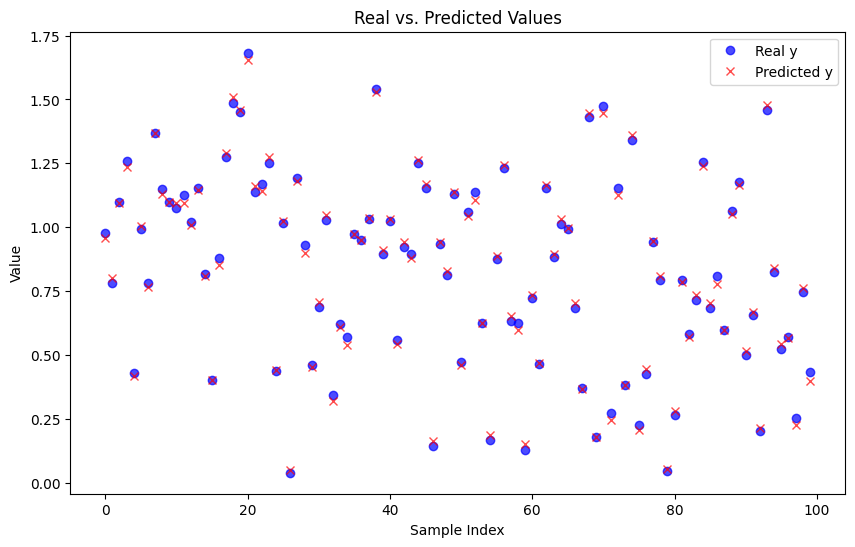

In [5]:
# Test the model
model.eval()
with torch.no_grad():
    test_y = model(x_tensor).numpy()  # Convert to numpy array for plotting

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_tensor.numpy(), label='Real y', color='blue', marker='o', linestyle='none', alpha=0.7)
plt.plot(test_y, label='Predicted y', color='red', marker='x', linestyle='none', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Real vs. Predicted Values')
plt.legend()
plt.show()